# Load Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The PTB Diagnostic ECG Database

    Number of Samples: 14552
    Number of Categories: 2
    Sampling Frequency: 125Hz
    Data Source: Physionet's PTB Diagnostic Database
    ECG lead II re-sampled to the sampling frequency of 125Hz as the input (from ECG Heartbeat Classification: A Deep Transferable Representation)
    Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.
    The final element of each row denotes the class to which that example belongs.


The shape of the normal dataframe is :  (4046, 188)
The shape of the abnormal dataframe is :  (10506, 188)
Normal Dataset Class: 
0.0
Abormal Dataset Class: 
1.0
The last time value is :  1488.0
Concatenated dataframe
(14552, 188)


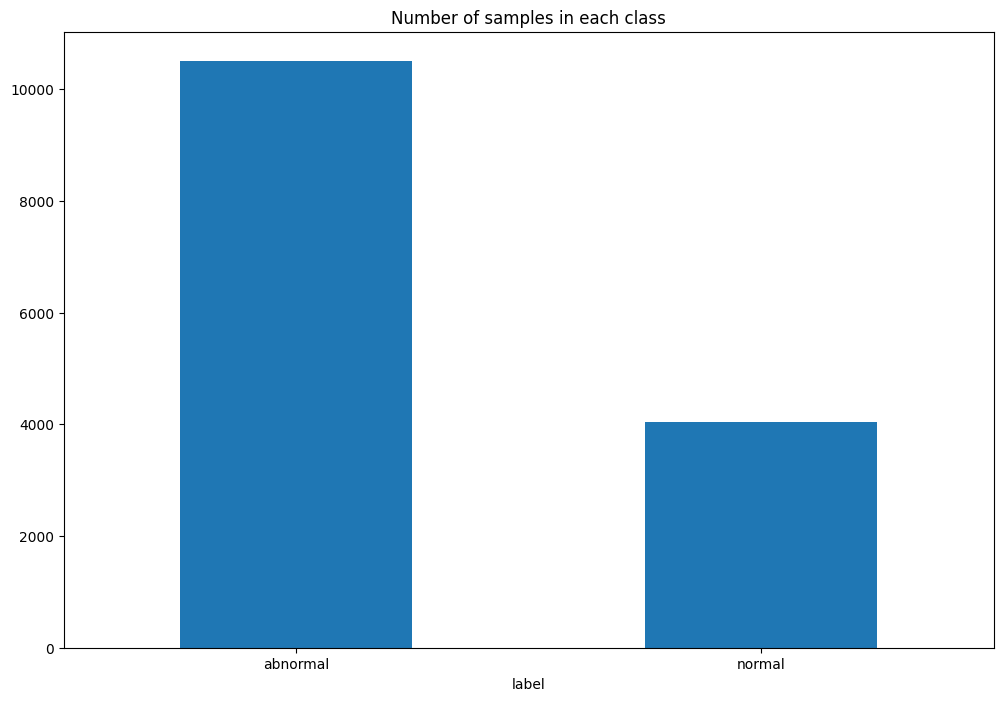

In [3]:
df_ptbd_normal = pd.read_csv("/Users/surajkumar/Desktop/LLNL/src/data/ptbdb_normal.csv", header = None)
df_ptbd_abnormal = pd.read_csv("/Users/surajkumar/Desktop/LLNL/src/data/ptbdb_abnormal.csv", header = None)

# Number of Samples

print("The shape of the normal dataframe is : ", df_ptbd_normal.shape)
print("The shape of the abnormal dataframe is : ", df_ptbd_abnormal.shape)

print("Normal Dataset Class: ")
print(df_ptbd_normal.iloc[:, -1][0])

print("Abormal Dataset Class: ")
print(df_ptbd_abnormal.iloc[:, -1][0])


# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal", 
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_ptbd_normal.shape[1] - 1 
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_ptbd_normal.columns = list(time) + ["label"]
df_ptbd_abnormal.columns = list(time) + ["label"]

# concatenate the two dataframes
df_ptbd = pd.concat([df_ptbd_normal, df_ptbd_abnormal], axis = 0)

print("Concatenated dataframe")
print(df_ptbd.shape)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure 
plt.figure(figsize = (12, 8))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()



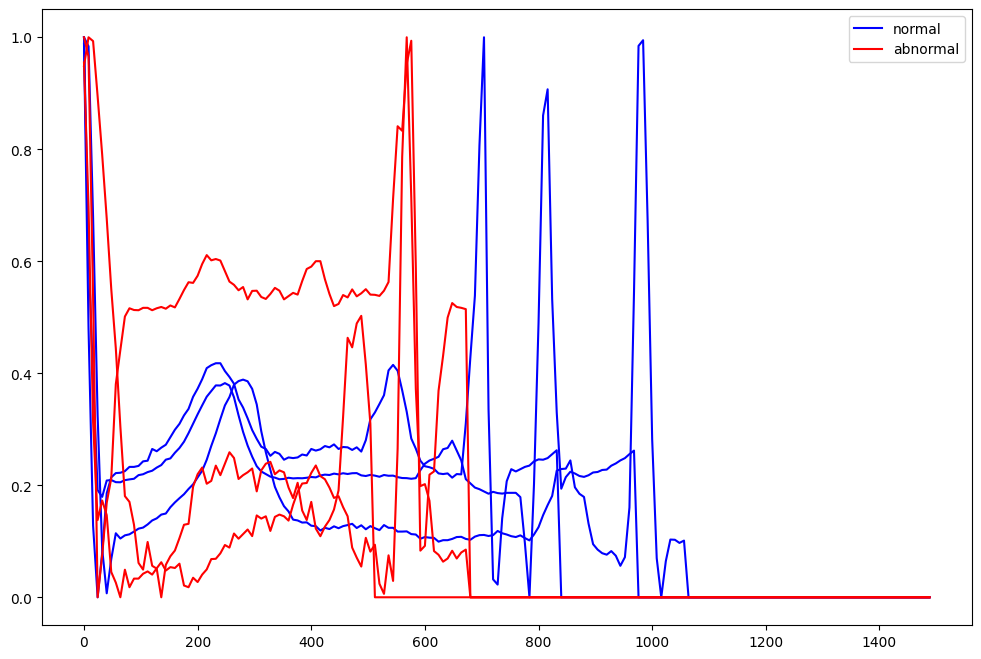

In [4]:

# select 10 random rows with class 0 (normal) and 3 with class 1 (abnormal)
df_ptbd_normal = df_ptbd[df_ptbd["label"] == 0].sample(3)
df_ptbd_abnormal = df_ptbd[df_ptbd["label"] == 1].sample(3)

plt.figure(figsize = (12, 8))
# plot the normal sequences
for i in range(df_ptbd_normal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1], color = "blue", label = "normal")
    else:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1],color = "blue")
# plot the abnormal sequences
for i in range(df_ptbd_abnormal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red", label = "abnormal")
    else:   
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red")
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
plt.show()

# Data Preparation

In [5]:
from sklearn.model_selection import train_test_split

X = df_ptbd.iloc[:,:-1]
y = df_ptbd.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11641, 187)
(11641,)
(1455, 187)
(1455,)


# Model

Epoch 1/100


/Users/surajkumar/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.7281 - loss: 1.4331 - val_accuracy: 0.7033 - val_loss: 1.0944
Epoch 2/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.7343 - loss: 1.0587 - val_accuracy: 0.7644 - val_loss: 0.9198
Epoch 3/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.7798 - loss: 0.9614 - val_accuracy: 0.7960 - val_loss: 0.8988
Epoch 4/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.8058 - loss: 0.8657 - val_accuracy: 0.8015 - val_loss: 0.7815
Epoch 5/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.8130 - loss: 0.8178 - val_accuracy: 0.8132 - val_loss: 0.7247
Epoch 6/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8177 - loss: 0.7926 - val_accuracy: 0.8221 - val_loss: 0.7570
Epoch 7/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8277 - loss: 0.7319 - val_accuracy: 0.8317 - val_loss: 0.6490
Epoch 8/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.8431 - loss: 0.6758 - val_

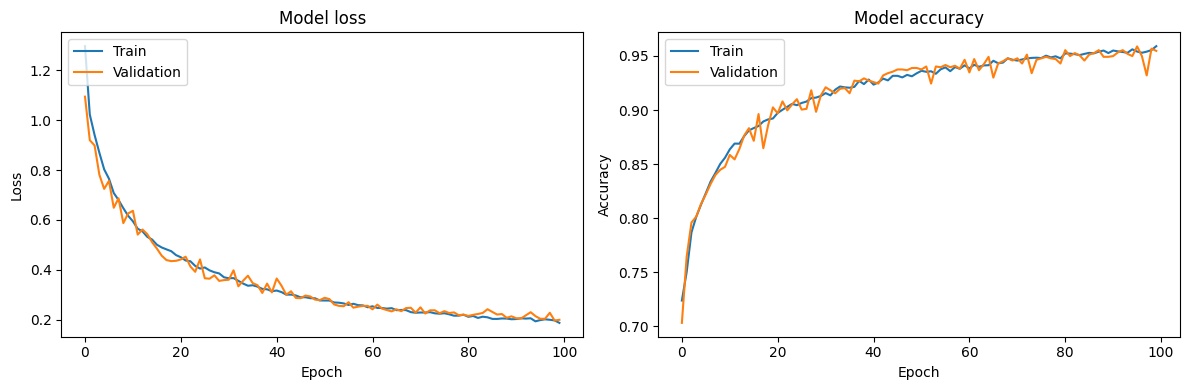

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Custom Loss Function to penalize false negatives more than other errors
def custom_loss(y_true, y_pred):
    # Standard binary crossentropy
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    
    # Condition: y_pred close to 0 (using 0.5 as threshold) and y_true is 1
    predicted_0s = tf.less(y_pred, 0.5)
    true_1s = tf.equal(y_true, 1)
    condition = tf.logical_and(predicted_0s, true_1s)

    # Multiply loss by 2 where condition is met
    modified_bce = tf.where(condition, bce * 10, bce)
        
    return modified_bce

model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss=custom_loss,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(12, 4))

# Plot training and validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training and validation acc values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Analyzing False Positives and False Negatives

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


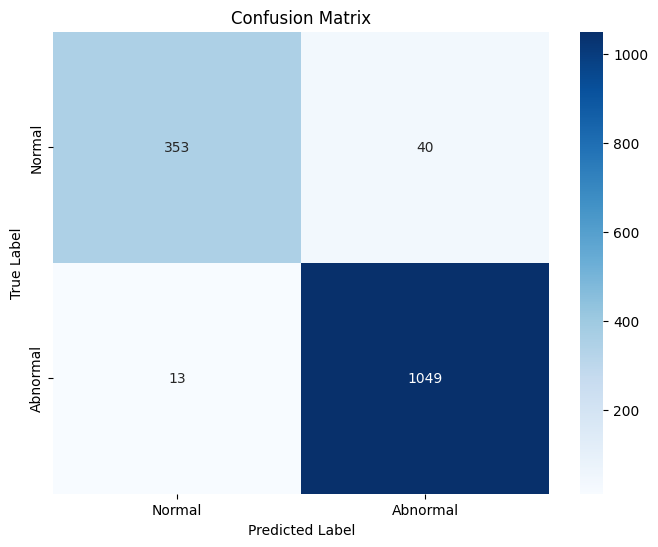

Precision of Model (involves labels classified as abnormal but are actually normal): 0.9633
Recall of Model (involves labels classified as normal but are actually abnormal): 0.9878


In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create labels
class_names = ['Normal', 'Abnormal']

# Create a heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

precision = cm[1][1]/(cm[1][1]+cm[0][1])
recall = cm[1][1]/(cm[1][1]+cm[1][0])
print(f"Precision of Model (involves labels classified as abnormal but are actually normal): {precision:.4f}")
print(f"Recall of Model (involves labels classified as normal but are actually abnormal): {recall:.4f}")
